<a href="https://colab.research.google.com/github/crispu93/DBScan_algorithm/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

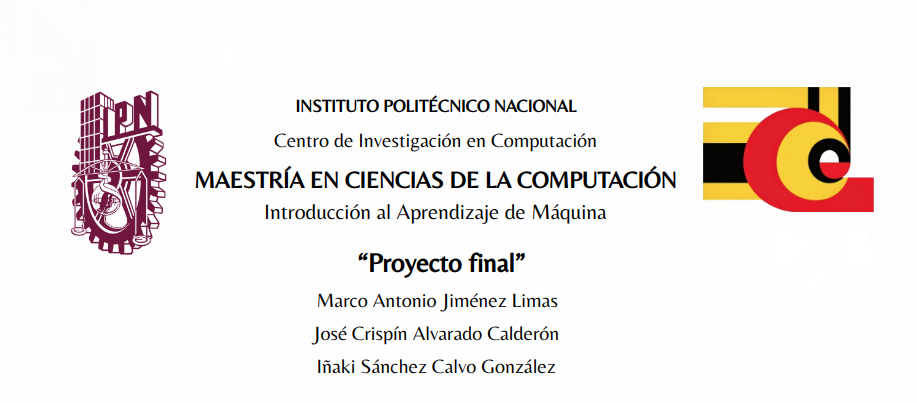

# Principios del DBSCAN

## Clustering o agrupamiento

* Clustering es una técnica de Machine Learning (ML) que involucra el agrupamiento de los datos de entrada en una colección de rango finito de grupos de acuerdo a una similaritud en sus propiedades.
Esta técnica desempeña uno de los roles más importantes al ser una de las más utilizadas para el procesamiento de datos en aprendizaje no supervisado.

* Los algoritmos que caen dentro de ésta técnica pueden ser clasificados ásperamente dentro de siete clases: *Hierarchical algorithms, Density-based algorithms, Partitional algorithms, Graph-based algorithms, combinational algorithms, Grid-based algorithms* , y *Model-based algorithms*.

* Dentro de esta variedad de algoritmos, los basados en densidad (Density-based algorithms) son conocidos por su facilidad de explicación y por su directa implementación. Los beneficios de usar este tipo de algoritmos se miden en su habilidad para encontrar clusters de formas variadas y diferentes medidas dentro del conjunto de datos y en que el número de clusters no necesita ser especificado por el usuario [1].

### Definiciones
A continuación se presentan las definiciones que aparecieron en el artículo original de Ester y col. de 1996 [2].

En lo que sigue, consderemos un conjunto $P$ de puntos en el espacio $d$-dimensional $\mathbb R^d$. 
* Dados dos puntos $p,q\in \mathbb R^d$ denotamos por $dist(p,q)$ a la distancia euclidiana entre $p$ y $q$.
* Denotamos también por $B(p,r)$ a la bola centrada en $p\in \mathbb R^d$ con radio $r$, es decir, $B(p,r)=\{q\in \mathbb R^d \vert dist(p,q)\leq r\}$.

#### Definición 1.
Dados $\epsilon \in \mathbb R$ y $minPts\in \mathbb Z$,
* Un punto $p\in P$ es un **punto core** o **punto núcleo** si $B(p,\epsilon)$ cubre al menos $minPts$ puntos de $P$ (incluyendo al mismo $p$).
* Un punto $p\in P$ es un **punto frontera** si $B(p,\epsilon)$ contiene menos de $minPts$ puntos (no es un punto core) pero pertenece a la bola centrada en un punto core de radio $\epsilon$.
* Un punto $p\in P$ es un **punto ruido** si no es ni punto núcleo ni punto frontera.

![Core point](https://3.bp.blogspot.com/-rDYuyg00Z0w/WXA-OQpkAfI/AAAAAAAAI_I/QshfNVNHD_wXJwXEipRIVzDSX5iOEAy2wCEwYBhgL/s1600/DBSCAN_Points.PNG)

#### Definición 2.
Un punto $q\in P$ es **density-reachable** desde $p\in P$ si existe una sucesión de puntos $p_1,p_2,...,p_t\in P$, para algún entero $t\geq 1$, tal que:
* $p_1 = p$ y $p_t=q$ 
* $p_1,p_2,...,p_{t-1}$ son puntos core
* $p_{i+1}\in B(p_i,\epsilon)$ para cada $i\in [1, t-1]$

![Density reachable](https://media.springernature.com/original/springer-static/image/prt%3A978-0-387-39940-9%2F4/MediaObjects/978-0-387-39940-9_4_Part_Fig1-605_HTML.jpg)

#### Definición 3.
Un **cluster** C es un subconjunto no vacío de un conjunto de puntos $P$ tal que:
* (Maximalidad) Si un punto núcleo $p\in C$, entonces todos los puntos density-reachable desde $p$ también pertenecen a $C$.
* (Conectividad) Para cualesquiera $p_1,p_2\in C$, existe un punto $p\in C$ tal que $p_1$ y $p_2$ son ambos density-reachable desde $p$.

![Happy face](https://miro.medium.com/max/675/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

#### Proposición 1. 
Dados $minPts$ y $\epsilon$, cualquier subconjunto finito $P\subset \mathbb R^d$ contiene un único conjunto de clusters.

#### Observaciones.
* En general, los clusters no son necesariamente disjuntos.
* Si $p$ aparece en más de un cluster tiene que ser un punto frontera y, por lo tanto,
* un punto núcleo solo puede pertenecer a un único cluster.

![example](https://raw.githubusercontent.com/crispu93/dbscan/main/example.png)

El problema **DBSCAN** plantea encontrar el único conjunto de clusters de $P$. En la literatura se pueden encontrar afirmaciones sobre la existencia de algoritmos que resuelven el problema en $O(n\log{n})$ donde $n$ es el número de puntos en $P$

# DBSCAN



El algoritmo propuesto por Gunawan (2013) resuelve efectivamente el problema en 2D con tiempo de ejecución $O(n\log{n})$. 

* Este algoritmo coloca arbitrariamente una rejilla $T$ sobre conjunto de puntos en $\mathbb R^2$, donde cada celda es un cuadrado de $\displaystyle \frac{\epsilon}{\sqrt{2}}\times\frac{\epsilon}{\sqrt{2}}$.

* Supongamos sin perdida de generalidad, que ningun punto de $P$ cae sobre alguna línea de $T$ (podemos mover infinitesimalmente $T$ de forma que se cumpla el supuesto). Notemos que cualesquiera dos puntos en la misma celda están separados por a lo más una distancia $\epsilon$.

* Diremos que una celda $c$ de $T$ *no está vacía* si contine al menos un punto de $P$, de otro modo, $c$ *está vacía*. Observemos que puede haber a lo más $n$ celdas no vacías.

* El algoritmo comienza un *proceso de etiquetado* para decidir su un punto $p\in P$ es un punto núcleo o no. Denotemos por $P(c)$ al conjunto de puntos de $P$ cubiertos por $c$. Una celda $c$ es una *celda núcleo* si $P(c)$ contiene al menos un punto núcleo. Denotemos también por $S_{core}$ al conjunto de celdas núcleo de $T$.


En la siguiente figura (Fig. 3(a)) donde $minPts = 4$ hay $6$ celdas núcleo que se muestran de color gris (puntos núcleo en negro y los no núcleo en blanco)

![example algorithm](https://raw.githubusercontent.com/crispu93/dbscan/main/example_algorithm.png)

Sea $G=(V,E)$ el grafo definido como sigue:
* Cada uno de los vértices en $V$ corresponde a distinta celda núcleo en $S_{core}$.
* Dadas dos celdas distintas $c_1,c_2\in S_{core}$, $E$ contiene una arista entre $c_1$ y $c_2$ sí y solamente sí existen puntos núcleo $p_1\in P(c_1)$ y $p_2\in P(c_2)$ tal que $dist(p_1, p_2)\leq \epsilon$.

El algoritmo, después de construir el grafo $G$ procede a encontrar los componentes conectados de $G$.
* Sea $k$ el número de estos componentes,
* $V_i (1\leq i\leq k)$ el conjunto de vértices en el $i$-ésimo componente conectado, y
* $P(V_i) (1\leq i\leq k)$ el conjunto de puntos núcleo cubierto por las celdas de $V_i$. 

Entonces:

### Lema 1. 
El número $k$ es el número de clusters en $P$. Además $P(V_i) (1\leq i\leq k)$ es exactamente el conjunto de puntos núcleo en el $i$-ésimo cluster.

### Proceso de etiquetado (para saber si un punto es núcleo o no).
Dos celdas $c_1$ y $c_2$ de $T$ son vecinas si la mínima distancia entre dos puntos de ellas es menor a $\epsilon$. En la Figura 3(c) se muestran todas las celdas que son vecinas a la celda que contiene a $o_{10}$.

* Cada celda no vacía contiene a lo más $21$ celdas vecinas y si una celda no vacía $c$ contiene al menos $minPts$ puntos, entonces todos esos puntos deben ser puntos núcleo.

* Ahora consideremos una celda $c$ con $\vert P(c) \vert < minPts$. Cada punto $p\in P(c)$ puede o no ser un punto núcleo. Para averiguarlo, el algoritmo calcula las distancias entre $p$ y cada una de las celdas vecinas de $c$. Con esto calculamos explícitamente $\vert B(p,\epsilon)\vert$ y por lo tanto si $p$ es un punto núcleo o no.

### Construcción del grafo $G$.
Fijamos una celda core $c_1$. Explicaremos como obtener las aristas incidentes a $c_1$ en $E$.

* Sea $c_2$ una celda núcleo que es vecina de $c_1$. Para cada punto $p\in P(c_1)$, encontramos el punto núcleo $p^\prime\in c_2$ que está más cercano a $p$. Si $dis(p,p^\prime)\leq \epsilon$, se agrega la arista $(c_1,c_2)$ a $G$.
* Por otro lado, si todos los $p\in P(c_1)$ fueron recorridos y no se agregó ninguna arista, entonces $E$ no tiene arista entre $c_1$ y $c_2$.

Como consecuencia, cada celda núcleo $c_1$ tiene $O(1)$ aristas incidentes en $E$ (la cantidad de vecinos es $O(1)$, constante). Por lo tanto $E$ contiene solamente una cantidad lineal $O(n)$ de aristas.

### Asignación de los puntos frontera a los clusters.
Remarquemos que cada $P(V_i) (1\leq i\leq k)$ incluye solamente los puntos núcleo del $i$-ésimo cluster de $P$. Aún nos falta asignar los puntos no núcleo (y por lo tanto puntos frontera) a su cluster correspondiente. 
* Para hacer esto, simplemente consideramos que si $p$ es un punto núcleo y $q$ es un punto tal que $dist(p,q)\leq \epsilon$ entonces este último punto debe ser añadido al cluster (único) de $p$.
* Para encontrar todos los puntos núcleo en cuestión $p$, Gunawan realiza el siguiente procedimiento. Sea $c$ la celda donde un punto $q$ cae. Para cada celda vecina $c^\prime$ de $c$, se calculan las distancias de $q$ a todos los puntos núcleo en $c^\prime$.

### Tiempo de ejecución.
Gunawan mostró que, sin la construcción del grafo $G$, el resto del algoritmo se ejecuta en $O(minPts\cdot n)=O(n)$ en tiempo promedio o $O(n\log n)$ en el peor caso. El cálculo de $G$ requiere $O(n)$ consultas a los vecinos más cercanos, cada una de las cuales puede ser resuelta en $O(\log n)$ (al construir el diagrama de Voronoi para cada celda núcleo, por ejemplo). Por lo tanto, el tiempo general de ejecución está acotado por $O(n\log n)$

### Algoritmo en el caso general $d\geq 3$.
Existen varios algoritmos que pueden resolver el problema DBSCAN en tiempo de ejecución $O(n^2)$ pero se puede mostrar que extendiendo las ideas de Gunawan, existe un algoritmo que resuelve el problema en tiempo sub cuadrático esperado $O(n^{2-\frac{2}{\lceil d/2\rceil+1}+\delta})$, donde $\delta>0$ es una constante que puede ser tan pequeña como se quiera. [6]

# Nuestra implementacion del DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import make_circles

%matplotlib inline

Para las distancias se uso la funcion cdist de scipy

In [ ]:
def dbscan_implemetation(X,eps,min_samples,distancia='euclidean'):
  ds=distance.cdist(X, X,distancia)
  presicion =str(eps)
  presicion[::-1].find('.')

  ds=np.round(ds, presicion[::-1].find('.'))
  clusters_set=[]
  for point in range(X.shape[0]):
    Eps_neighborhood = np.where(ds[point,:] <= eps)[0].astype(int)
    if len(Eps_neighborhood) >= min_samples: #Is a core object
      cluster = set(Eps_neighborhood)
      if len(clusters_set) == 0:
        clusters_set.append(cluster)
      else:
        cluster_indicator = 0
        for number_of_cluster in range(len(clusters_set)):
          if len(cluster & clusters_set[number_of_cluster]) != 0:
            clusters_set[number_of_cluster] = cluster | clusters_set[number_of_cluster]
            cluster_indicator += 1
            
        if cluster_indicator == 0:
          clusters_set.append(cluster)

  labels = np.array([0]*X.shape[0])

  for i in range(len(clusters_set)):
    clus = np.array(list(clusters_set[i])).astype(int)
    labels[clus]=i+1
  
  return labels

![working](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

![Cluster3](https://dashee87.github.io/images/DBSCAN_search.gif)

Se prueba con el dataset 'make circles'

Text(0.5, 1.0, 'DBSCAN our implementation')

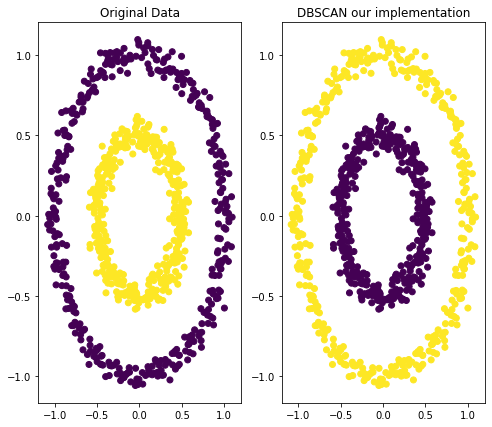

In [ ]:
X,Y = make_circles(n_samples=800,factor=.5, noise=0.05)
clusters = dbscan_implemetation(X,eps=0.17, min_samples=5,distancia='euclidean')
#clusters=clusters*-1+100
plt.rcParams['figure.figsize'] = [8, 7]
_, fig1 = plt.subplots(1,2)
fig1[0].scatter(X[:,0],X[:,1],c=Y)
fig1[0].set_title('Original Data')
fig1[1].scatter(X[:,0],X[:,1],c=clusters)
fig1[1].set_title('DBSCAN our implementation')

# DBSCAN en Sklearn

In [ ]:
from sklearn.cluster import DBSCAN
import warnings 
warnings.filterwarnings('ignore')

## Ejemplo con el dataset 'make moons'

Text(0.5, 1.0, 'DBSCAN Sklearn')

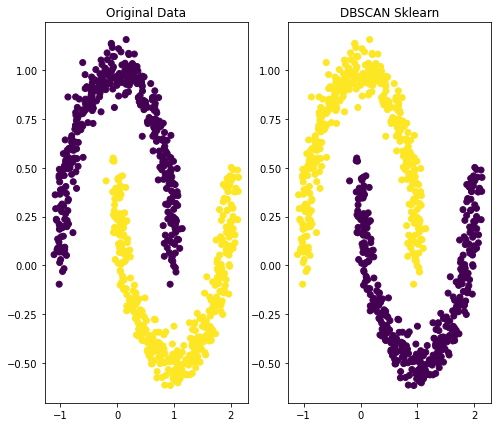

In [ ]:
from sklearn import datasets

X_nm,Y_nm = datasets.make_moons(n_samples=800, noise=.07)

dbscan = DBSCAN(eps=0.14, min_samples=6)
dbscan.fit(X_nm)

plt.rcParams['figure.figsize'] = [8, 7]
_, fig3=plt.subplots(1,2)
fig3[0].scatter(X_nm[:,0],X_nm[:,1],c=Y_nm)
fig3[0].set_title('Original Data')
fig3[1].scatter(X_nm[:,0],X_nm[:,1],c=dbscan.labels_)
fig3[1].set_title('DBSCAN Sklearn')


In [ ]:
dbscan = DBSCAN(eps=0.12, min_samples=7)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.12, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

## DBSCAN con imagenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/Imagenes Segmentar"
!ls

/content/drive/My Drive/Colab Notebooks/Imagenes Segmentar
flamingo.jpg  jcc.jpg  pimientos-colores.jpg  tigre.jpg


In [ ]:
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image,ImageOps

(600, 450, 3)


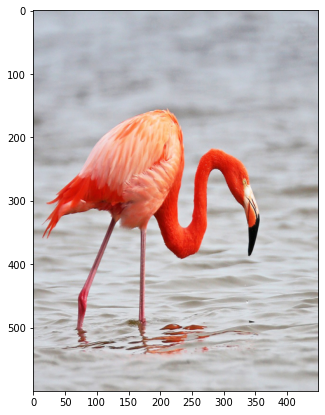

In [ ]:
path_im = 'flamingo.jpg'
im = os.path.join(path_im)
image = Image.open(im)
image = image.resize((450,600))
image = np.array(image)
print(image.shape)
plt.figure()
plt.imshow(image.astype(int))

In [ ]:
im=image.reshape(image.shape[0]*image.shape[1],image.shape[2])

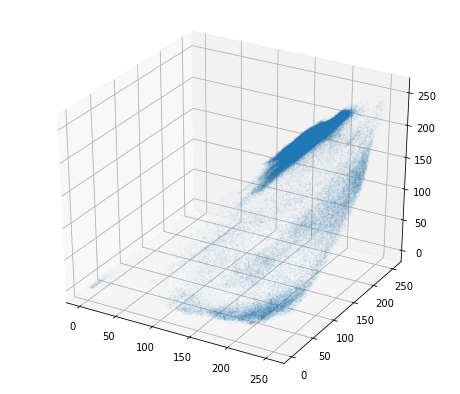

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(image[:,:,0],image[:,:,1],image[:,:,2],s=0.001)

In [ ]:
dbscan = DBSCAN(eps=0.01, min_samples=50)
im=im/255
dbscan.fit(im)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [ ]:
im_seg=dbscan.labels_.copy()
im_seg=im_seg.reshape(image.shape[0],image.shape[1])
im_seg[im_seg == -1] = 250
for i in range(dbscan.labels_.max()+1):
  im_seg[im_seg == i] = int((i*255)/(dbscan.labels_.max()+2))

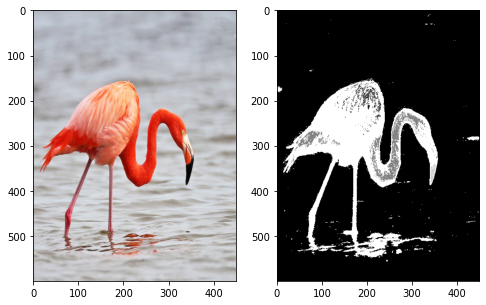

In [ ]:

_, axarr = plt.subplots(1,2)
axarr[0].imshow(image.astype(int))
axarr[1].imshow(im_seg,cmap='gray')

# Comparacion de nuestra implementación y la de Sklearn

Se compara como agrupa el DBSCAN de Sklearn y el que implementamos bajo los mismos parametros de 'eps' y 'min_sample' en diferentes data sets

In [ ]:
from sklearn import cluster, datasets, mixture
n_samples = 1500

#### Noisy circles

In [ ]:
circles_x,circles_y = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
eps=0.14
min_samples=6

In [ ]:
dbscan_circles = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_circles.fit(circles_x)
n_dbscan_circles=dbscan_implemetation(circles_x,eps=eps, min_samples=min_samples,distancia='euclidean')

#### Noisy moons

In [ ]:
moons_x,moons_y=datasets.make_moons(n_samples=n_samples, noise=.05)
eps=0.14
min_samples=6

In [ ]:
dbscan_moons = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_moons.fit(moons_x)
n_dbscan_moons=dbscan_implemetation(moons_x,eps=eps, min_samples=min_samples,distancia='euclidean')

#### Blobs

In [ ]:
blobs_x,blobs_y = datasets.make_blobs(n_samples=n_samples, random_state=8)
eps=0.8
min_samples=6

In [ ]:
dbscan_blobs = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_blobs.fit(blobs_x)
n_dbscan_blobs=dbscan_implemetation(blobs_x,eps=eps, min_samples=min_samples,distancia='euclidean')

### Resultados

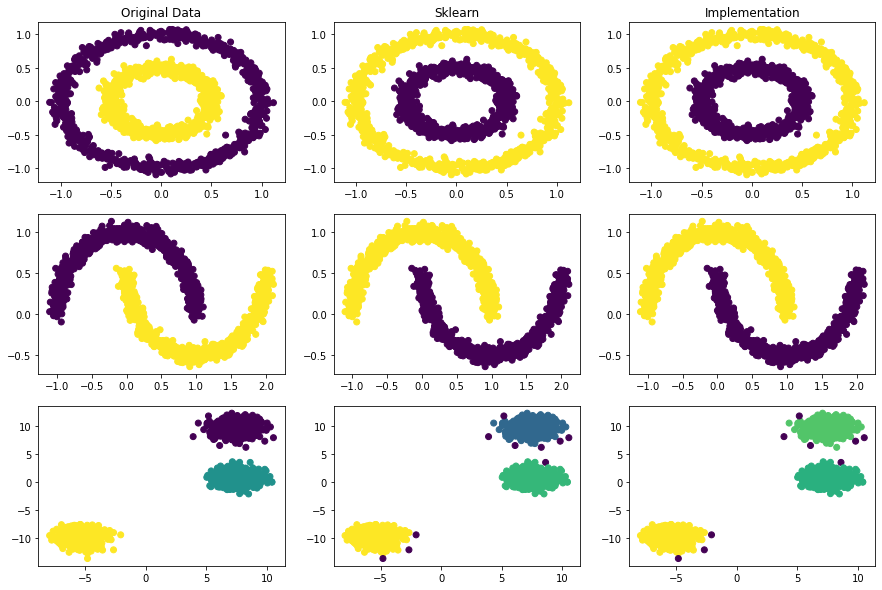

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
_, fign=plt.subplots(3,3)
fign[0,0].scatter(circles_x[:,0],circles_x[:,1],c=circles_y)
fign[0,0].set_title('Original Data')
fign[0,1].scatter(circles_x[:,0],circles_x[:,1],c=dbscan_circles.labels_)
fign[0,1].set_title('Sklearn')
fign[0,2].scatter(circles_x[:,0],circles_x[:,1],c=n_dbscan_circles)
fign[0,2].set_title('Implementation')

fign[1,0].scatter(moons_x[:,0],moons_x[:,1],c=moons_y)
fign[1,1].scatter(moons_x[:,0],moons_x[:,1],c=dbscan_moons.labels_)
fign[1,2].scatter(moons_x[:,0],moons_x[:,1],c=n_dbscan_moons)

fign[2,0].scatter(blobs_x[:,0],blobs_x[:,1],c=blobs_y)
fign[2,1].scatter(blobs_x[:,0],blobs_x[:,1],c=dbscan_blobs.labels_)
fign[2,2].scatter(blobs_x[:,0],blobs_x[:,1],c=n_dbscan_blobs)



# Ventajas sobre otro método

## Comparación con K-means clustering 

A continuación mostramos los resultados de la clasificación obtenida por K means el cual es un clasificador por centroide más cercano. 

El algoritmo de manera intuitiva produce k puntos aleatorios (especificados por el usuarió), que pueden o no pertenecer a los conjuntos a clasificar. Después produce lineas equidistantes entre éstos y calcula el centroide de todos los puntos que se encuentrén de su lado. Se mueve el k-punto al centroide correspondiente y si se reclasifican puntos del dataset  se repite el cálculo de lineas equidistantes y centroides hasta que se estabilice.

El problema con éste método es que generalmente termina realizando separaciones por estrellas como la mostrada en la imágen.

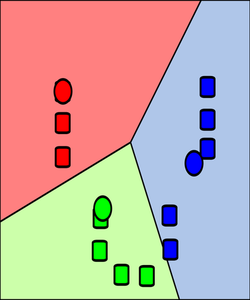

Éstas divisiones del espacio no puden tratar con conjuntos cóncavos o con agujeros por lo que terminamos con clasificaciones equvocadas como las mostradas a continuación.

Text(0.5, 1.0, 'K-means Sklearn')

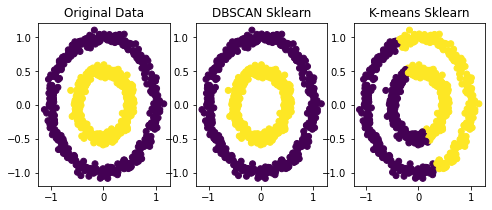

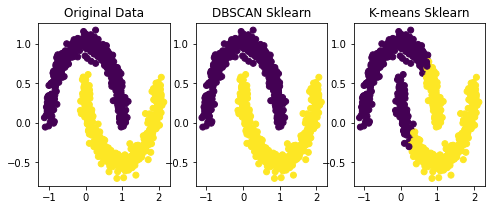

In [ ]:
from sklearn.cluster import KMeans

X,Y = make_circles(n_samples=800,factor=.5, noise=0.05)
dbscan = DBSCAN(eps=0.15, min_samples=6)
dbscan.fit(X)

kmeans=KMeans(n_clusters=2, random_state=0).fit(X)

plt.rcParams['figure.figsize'] = [8, 3]
_, fig2 = plt.subplots(1,3)
fig2[0].scatter(X[:,0],X[:,1],c=Y)
fig2[0].set_title('Original Data')
fig2[1].scatter(X[:,0],X[:,1],c=dbscan.labels_)
fig2[1].set_title('DBSCAN Sklearn')
fig2[2].scatter(X[:,0],X[:,1],c=kmeans.labels_)
fig2[2].set_title('K-means Sklearn')


#half moons
X_nm,Y_nm = datasets.make_moons(n_samples=800, noise=.07)
#DBscan 
dbscan = DBSCAN(eps=0.14, min_samples=6)
dbscan.fit(X_nm)
#Kmeans
Y_nm_km=KMeans(n_clusters=2, random_state=0).fit(X_nm)

plt.rcParams['figure.figsize'] = [8, 3]
_, fig3=plt.subplots(1,3)
fig3[0].scatter(X_nm[:,0],X_nm[:,1],c=Y_nm)
fig3[0].set_title('Original Data')
fig3[1].scatter(X_nm[:,0],X_nm[:,1],c=dbscan.labels_)
fig3[1].set_title('DBSCAN Sklearn')
fig3[2].scatter(X_nm[:,0],X_nm[:,1],c=Y_nm_km.labels_)
fig3[2].set_title('K-means Sklearn')

# Ventajas de DBSCAN
* Identifica clusters con forma o tamaño arbitrarios
* No necesita saber previamente el número de clusters dentro del conjunto de puntos (como k-means por ejemplo)
* Trata con el ruido en el conjunto de puntos


### Desventajas de DBSCAN
* Conjuntos de datos con densidades muy variadas, causan problemas a la hora de identificar los clusters
* Los parámetros de entrada pueden ser difíciles de determinar
* Cuando la dimensionalidad de los datos es alta, toma $O(n^2)$ en tiempo de ejecución.

# Propuesta para producir aprendizaje.

Una situación con el método DBSCAN es que no proporciona una hipótesis final, i. e. la clasificación se realiza con el conjunto de puntos completo del data set y al finalizar, los clusters no se pueden emplear de manera directa para establecer la pertenencia de un nuevo punto. Para ello se debe ejecutar el algoritmo nuevamente con el punto o puntos añadidos. 

Una proposición para producir aprendizaje es añadir al final de la clasificación un método de geometría computacional para obtener lo que se conoce como un $\alpha$-shape, definido por primera vez por Edelsbrunner [3], Kirkpatrick & Seidel.

Supongamos que tenemos un conjunto $S \subset \mathbb{R}^d$ de n puntos y queremos obtener algo similar a la figura formada por estos. Una interpretación es el $\alpha$-shape el cual formaliza la noción intuitiva de forma de un conjunto finito de puntos en el espacio.

### Definición 4.

Sea $B(x,\lambda)$ la bola abierta de radio $\lambda$ centrada en algún punto $x$, con $0 < \lambda < \infty$, que denotaremos como $\lambda$-bola b. Diremos que la $\lambda$-bola b es vacia si $ b \cap S=\emptyset$. Entonces, se dice que un k-simplex $\Delta_T$ es $\alpha$-expuesto si existe una $\alpha$-bola vacia con $T=\partial b \cap S$, donde $\partial b$ es la frontera de la $\alpha$-bola b.

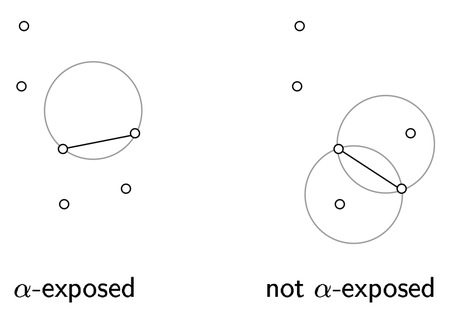

### Definición 5.

La frontera $\partial \mathcal{S}_\alpha$ de la $\alpha$-forma del conjunto de puntos $S$ consiste en todos los k-simplices de $S$ con $0\leq k < d$ que estan $\alpha$-expuestos.

\begin{equation*}
\partial \mathcal{S}_{\alpha} = \{ \Delta_T | T \subset S, |T| \leq d \quad \textrm{y } \Delta_T \quad  \alpha-\textrm{expuesta} \}
\end{equation*}

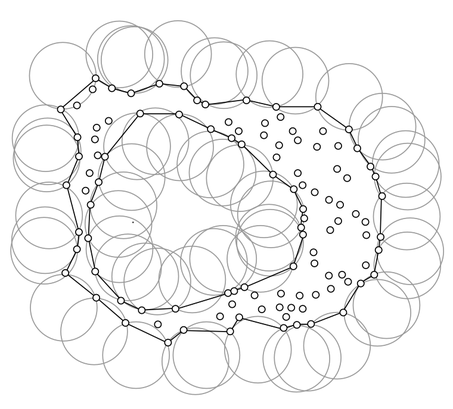

### Proposición 1.

Ya que una bola infinitamente pequeña expone cualquier punto en $S$ pero ninguno de los simplices de dimesión superior, y una $\alpha$-bola con $\alpha$ más grande que el radio de la bola más pequeña que encierra a todo el conjunto $S$ no permite a un simplex interior a ser $\alpha$-expuesto, entonces tenemos:
\begin{equation*}
\lim_{\alpha\rightarrow 0}\mathcal{S}_\alpha =S \quad \lim_{\alpha\rightarrow \infty}\mathcal{S}_\alpha =conv S
\end{equation*}

donde $conv S$ es la envolvente convexa.

Se puede probar que la frontera $\partial \mathcal{S}_\alpha$ de la $\alpha$-forma es para cualquier valor $0 \leq \alpha < \infty$ un subconjunto de la triangulación de Delaunay de $S$, entonces solo tenemos que considerar la caras de $DT(S)$ como candidatos para la $\alpha$-forma.

### Definición 6.

Dado un conjunto $S \subset \mathbb{R}^d$ en posición general, la triangulación de Delaunay de S es el conjunto de simplices $DT(S)$ consistente en:

* Todos los d-símplices $\Delta_T$ con $T \subset S$ tales que la circumesfera de $T$ no contiene ningún otro punto de $S$, 
* Todos los k-śimplices que son caras de otros símplices en $DT(S)$.

### Proposición 2.

Si $\Delta_T$ es una simplex $\alpha$-expuesto de $S$, entonces $\Delta_T\in DT(S)$.

### Proposición 3.

Para $0\leq \alpha < \infty$ tenemos que  $\partial \mathcal{S}_\alpha \subset DT(S)$

### Definición 7.

Para un conjunto finito de puntos dado $S \subset \mathbb{R}^d$ y $0 < \lambda < \infty$, el $\alpha$-complex $\mathcal{C}_\alpha(S)$ de $S$ es un subconjunto de $DT(S)$. Un simplex $\Delta_T \in DT(S)$ estará en $\mathcal{C}_\alpha(S)$ si:

* $\sigma_T<\alpha $ y la $\sigma_T$-bola localizada en $\mu_T$ esta vacía,
* $\Delta_T$ es una cara de otro simplex en $\mathcal{C}_\alpha(S)$

### Proposición 4.

Sea $\Delta_T \in  \partial \mathcal{S}_\alpha(S)$ cualquier simplex, entonces $\Delta_T\in  \mathcal{C}_\alpha(S)$

### Proposición 5.

Sea $\Delta_T \in  \partial \mathcal{S}_\alpha(S)$ cualquier simplex, entonces $\Delta_T\in \partial \mathcal{C}_\alpha(S)$

### Proposicón 6.

Sea $\Delta_T \in  \partial \mathcal{C}_\alpha(S)$, entonces $\Delta_T\in \partial \mathcal{S}_\alpha(S)$

$\therefore \partial \mathcal{S}_\alpha(S)= \partial \mathcal{C}_\alpha(S)$


Con estos resultados seleccionamos los simplex que tienen dos $\alpha$-bolas, siendo una de ellas es $\alpha$-expuesta y garantizando que se encuentran en la frontera. Por lo tanto, éste conjunto es la $\alpha$-forma del conjunto de puntos $S$.

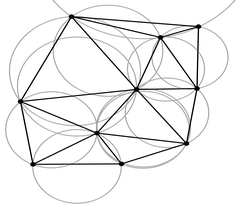


La complejidad del método más directo para computar eficientemente la triangulación de Delaunay es $O(n^2)$, aunque existen mejores implementaciones para casos particulares de 2 dimensiones con complejidad de $O(n\log n)$. 

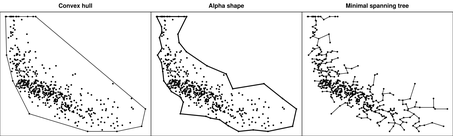

La frontera proporcionada por el método la podriamos usar como hipotesis final del aprendizaje; al identificar si los nuevos puntos se encuentran dentro o fuera de ésta. Utilizando Ray casting algorithm facilmente podemos ver si un rayo que parte del punto en cuestión con cualquier dirección, cruza un número par de veces la frontera, entonces estará fuera de dicho cluster y si es un número impar entonces estará dentro. 

Adicionalmente podríamos cambiar la frontera bien definida por una función sigmoidal que dependería de la cardinalidad del conjunto de puntos no densos de cada cluster, pero se requieren otras medidas para establecer cómo cambia la densidad en la frontera. Añadiendo al algoritmo un número máximo de puntos, para evaluar al conjunto no denso del cluster. 

In [ ]:
!pip install alphashape
!pip install descartes

(-0.75, 1.25)

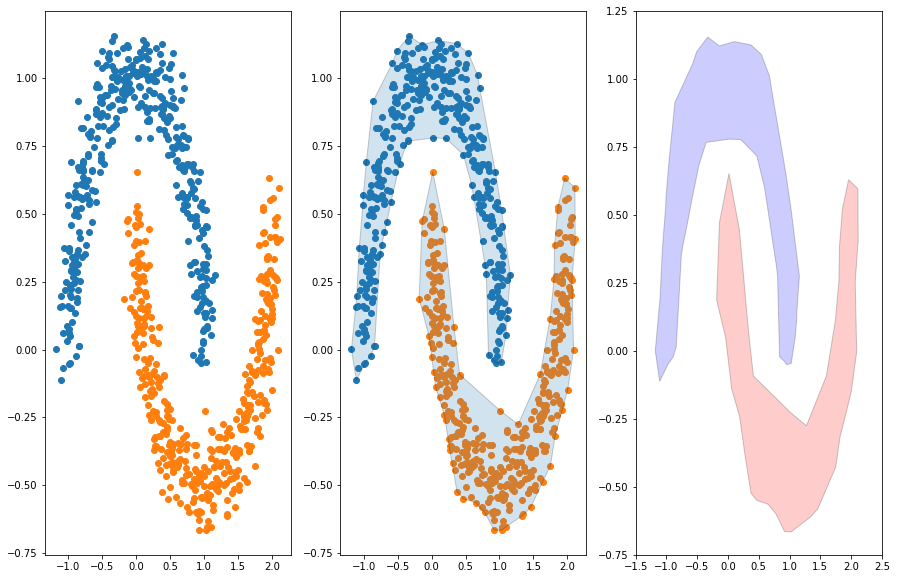

In [ ]:
import sys
import numpy as np
import alphashape
import matplotlib.pyplot as plt
from sklearn import datasets
from descartes import PolygonPatch
from sklearn.cluster import DBSCAN

S_m, YS_m=datasets.make_moons(n_samples=800, noise=.09)

dbscan=DBSCAN(eps=0.13, min_samples=6)
dbscan.fit(S_m)

#alpha shape
DS=np.concatenate((S_m,np.reshape(dbscan.labels_,(len(dbscan.labels_),1))),axis=1)
DS0=np.delete(DS,np.where(DS[:,2]!=0),0)
DS1=np.delete(DS,np.where(DS[:,2]!=1),0)

alpha_shape=alphashape.alphashape(DS0[:,0:2],2.5)
alpha_shape1=alphashape.alphashape(DS1[:,0:2],2.5)

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax=plt.subplots(1,3)

ax[0].scatter(DS0[:,0],DS0[:,1])
ax[0].scatter(DS1[:,0],DS1[:,1])

ax[1].scatter(DS0[:,0],DS0[:,1])
ax[1].add_patch(PolygonPatch(alpha_shape, alpha=0.2))
ax[1].scatter(DS1[:,0],DS1[:,1])
ax[1].add_patch(PolygonPatch(alpha_shape1, alpha=0.2))
        
ax[2].add_patch(PolygonPatch(alpha_shape,fc='b', alpha=0.2))
ax[2].add_patch(PolygonPatch(alpha_shape1, fc='r', alpha=0.2))
ax[2].set_xlim([-1.5, 2.5])
ax[2].set_ylim([-0.75, 1.25])


Referencias.

[1] Nidhi, Km Archana Patel, 2016. An Efficient and Scalable Density-based Clustering Algorithm for Normalize Data, Procedia Computer Science. 

[2] Martin Ester, Hans-Peter Kriegel, Jorg Sander, and Xiaowei Xu. 1996. A Density-Based Algorithm for
Discovering Clusters in Large Spatial Databases with Noise. In Proceedings of ACM Knowledge
Discovery and Data Mining (SIGKDD). 226–231.

[3] H. Edelsbrunner. Weighted alpha shapes. Technical Report UIUCDCS-R-
92-1760, Dept. Comput. Sci., Univ. Illinois, Urbana, IL, 1992.

[4] H. Edelsbrunner and E. P. Mücke. Three-dimensional alpha shapes.
Manuscript UIUCDCS-R-92-1734, Dept. Comput. Sci., Univ. Illinois,
Urbana-Champaign, IL, 1992.

[5] H. Edelsbrunner and E. P. Mücke. Simulation of simplicity: A technique
to cope with degeneratcases in geometric algorithms. ACM Trans. Graph.,
9(1):66–104, 1990.

[6] Junhao Gan, Yufei Tao, 2017. On the Hardness and Approximation of Euclidean DBSCAN. ACM Transactions on Database Systems.

[7] Kaspar Fischer. Introduction to Alpha Shapes. kfischer@iiic.ethz.ch—26. V. 2000